In [12]:
import numpy as np
import random
from collections import Counter
from scipy.stats import gmean, trim_mean

# Generate a list of 100 integers containing values between 90 to 130
int_list=[np.random.randint(90,130)for i in range(100)]

#1)mean function
def calculate_mean(numbers):
    return sum(numbers)/len(numbers)
#median function
def calculate_median(numbers):
    sorted_numbers=sorted(numbers)
    n=len(sorted_numbers)
    mid=n//2
    if n%2==0:
        return(sorted_numbers[mid-1]+sorted_numbers[mid])/2
    else:
        return(sorted_numbers[mid])

#2)mode function
def calculate_mode(numbers):
    freq=Counter(numbers)
    mode_data=freq.most_common(1)
    return mode_data[0],[0] if mode_data else None

#3) weighted mean function
def weighted_mean(values,weights):
    return sum( v*w for v,w in zip(values,weights))/sum(weights)

#4)geometric mean 
def geometric_mean(numbers):
    return gmean(numbers)

#5)harmonic mean
def harmonic_mean(numbers):
    return len(numbers)/sum(1/n for n in numbers)

#6)Midrange 
def calculate_midrange(numbers):
    return (min(numbers)+max(numbers))/2

#7) Trimmed mean
def trimmed_mean(numbers,trim_percent):
    return trim_mean(numbers,trim_percent)


mean = calculate_mean(int_list)
median = calculate_median(int_list)
Mode = calculate_mode(int_list)    
weighted_mean = weighted_mean(int_list, [1]*len(int_list))  # Uniform weights for simplicity
geometric_mean = geometric_mean(int_list)
harmonic_mean = harmonic_mean(int_list)
midrange = calculate_midrange(int_list)
trimmed_mean_10 = trimmed_mean(int_list, 0.1)  # Trim 10%

# Display results
print("Mean:", mean)
print("Median:", median)
print("Mode:", Mode)
print("Weighted Mean:", weighted_mean)
print("Geometric Mean:", geometric_mean)
print("Harmonic Mean:", harmonic_mean)
print("Midrange:", midrange)
print("Trimmed Mean (10%):", trimmed_mean_10)

Mean: 109.29
Median: 107.0
Mode: ((97, 6), [0])
Weighted Mean: 109.29
Geometric Mean: 108.63295270169775
Harmonic Mean: 107.97963773332225
Midrange: 109.5
Trimmed Mean (10%): 109.15


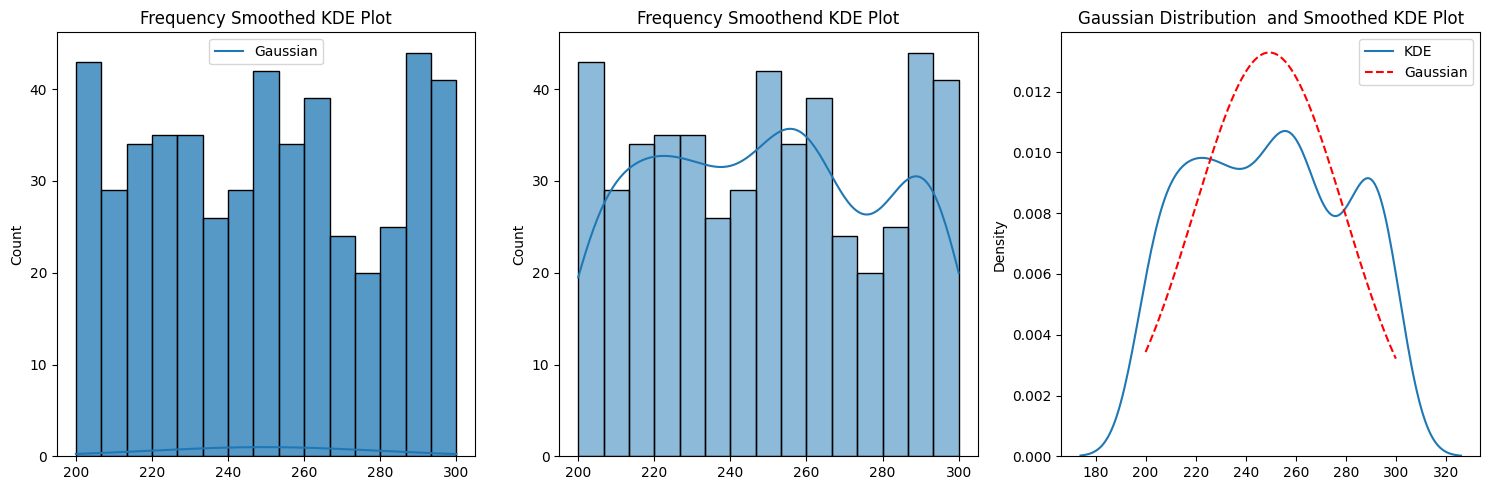

range_val= 100 
 variance= 903.1562124248497 
 std_dev= 30.05255750223015 
 iqr= 51.25 
 cv= 12.049459725845054 
 mad= 25.803440000000002 
 quartile_deviation= 25.625 
 range_dispersion= 40.094623311014


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
np.random.seed(42)
int_list2=np.random.randint(200,301,size =500)

#1)Visualization
# Frequency & Gaussian distribution
plt.figure(figsize=(15,5))

# c)Frequency distribution (histogram)
plt.subplot(1,3,1)
sns.histplot(int_list2,bins=15,kde=False)
mean,std=np.mean(int_list2),np.std(int_list2)
x=np.linspace(200,300,500)
plt.plot(x,norm.pdf(x,mean,std)*len(int_list2)*(15/100),label='Gaussian')
plt.title('Frequency Smoothed KDE Plot')
plt.legend()

# b). Frequency smoothed KDE plot
plt.subplot(1,3,2)
sns.histplot(int_list2,bins=15,kde=True)
plt.title('Frequency Smoothend KDE Plot')

# c)Gaussian distribution & smoothed KDE plot
plt.subplot(1,3,3)
sns.kdeplot(int_list2,label='KDE')
plt.plot(x,norm.pdf(x,mean,std),color='red',linestyle='dashed',label='Gaussian')
plt.title('Gaussian Distribution  and Smoothed KDE Plot')
plt.legend()
plt.tight_layout()
plt.show()

#2) calculate the range 
def calculate_range(numbers):
    return max(numbers)-min(numbers)

#3)find the variance and standard deviation of a list of numbers.
def calculate_variance_std(numbers):
    variance=np.var(numbers,ddof=1)
    std_dev=np.sqrt(variance)
    return variance ,std_dev

#4)interquartile range (IQR)
def calculate_iqr(numbers):
    q1=np.percentile(numbers,25)
    q2=np.percentile(numbers,75)
    return q2-q1
#5)coefficient of variation
def calculate_cv(numbers):
    mean=np.mean(numbers)
    std_dev=np.std(numbers,ddof=1)
    return(std_dev/mean)*100

#6)mean absolute deviation
def calculate_mad(numbers):
    mean=np.mean(numbers)
    return np.mean(np.abs(numbers-mean))

#7)calculate quartile deviation
def calculate_quartile_deviation(numbers):
    iqr = calculate_iqr(numbers)
    return iqr / 2
    
#8)range-based coefficient of dispersion
def calculate_range_dispersion(numbers):
    range_val=calculate_range(numbers)
    mean=np.mean(numbers)
    return (range_val/mean)*100


# computing all requested metrics
range_val = calculate_range(int_list2)
variance, std_dev = calculate_variance_std(int_list2)
iqr = calculate_iqr(int_list2)
cv = calculate_cv(int_list2)
mad = calculate_mad(int_list2)
quartile_deviation = calculate_quartile_deviation(int_list2)
range_dispersion = calculate_range_dispersion(int_list2)

print('range_val=',range_val,'\n',
      'variance=', variance,'\n',
      'std_dev=',std_dev,'\n',
      'iqr=',iqr,'\n',
      'cv=', cv,'\n',
      'mad=',mad,'\n',
       'quartile_deviation=',quartile_deviation,'\n', 
      'range_dispersion=',range_dispersion)


In [79]:
#3 answer)
import numpy as np
class DiscreteRandomVariable:
    def __init__(self,outcomes, probabilities):
        if len(outcomes)!=len( probabilities):
            raise ValueError('outcomes and probabilities must have the same length')
        if not np.isclose(sum( probabilities),1):
            raise ValueError('probabilites must sum to 1.')

        self.outcomes=outcomes
        self. probabilities= probabilities

    def expected_value(self):
        return sum(o*p for o,p in zip(self.outcomes,self. probabilities))

    def variance(self):
        mean=self.expected_value()
        return sum(p*(o-mean)**2 for o,p in zip(self.outcomes,self. probabilities))


outcomes = [1, 2, 3, 4, 5]  # Possible outcomes
probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]  # Corresponding probabilities

random_var = DiscreteRandomVariable(outcomes, probabilities)

print("Expected Value:", random_var.expected_value())
print("Variance:", random_var.variance())

Expected Value: 3.2
Variance: 1.56


In [94]:
outcomes=[1,2,3,4,5,6]
probabilities=[1/6]*6 # equal probability for each side

# expected valaue
def expected_value(outcomes,probabilities):
    return sum(o*p for o,p in zip(outcomes,probabilities))

#3) variance
def variance (outcomes,probabilities):
    mean=expected_value(outcomes,probabilities)
    return sum(p*(o-mean)**2 for o,p in zip(outcomes,probabilities))

#4)simulate rolling dice
def simulate_rolls(num_rolls):
    return np.random.choice(outcomes,size=num_rolls, p=probabilities)

print("Expected Value:", expected_value(outcomes, probabilities))  # Should be 3.5
print("Variance:", variance(outcomes, probabilities))  # Should be around 2.92
print("Simulated Rolls:", simulate_rolls(10))  # Shows random rolls

Expected Value: 3.5
Variance: 2.9166666666666665
Simulated Rolls: [1 6 6 2 1 6 4 4 5 4]


In [107]:
#5ans)
import numpy as np

def generate_random_samples(distribution, params, sample_size):
    """
    Generate random samples from a specified probability distribution
    and calculate their mean and variance.
    """
    if distribution == 'binomial':
        n, p = params
        samples = np.random.binomial(n, p, sample_size)
    elif distribution == 'poisson':
        lambda_ = params[0]
        samples = np.random.poisson(lambda_, sample_size)
    else:
        raise ValueError("Unsupported distribution. Use 'binomial' or 'poisson'.")

    sample_mean = np.mean(samples)
    sample_variance = np.var(samples)

    return samples, sample_mean, sample_variance

# Binomial distribution with n=10 trials and p=0.5 probability of success
binomial_samples, binomial_mean, binomial_variance = generate_random_samples('binomial', (10, 0.5), 1000)
print("Binomial Samples Mean:", binomial_mean)
print("Binomial Samples Variance:", binomial_variance)

# Poisson distribution with lambda=4
poisson_samples, poisson_mean, poisson_variance = generate_random_samples('poisson', (4,), 1000)
print("\nPoisson Samples Mean:", poisson_mean)
print("Poisson Samples Variance:", poisson_variance)


Binomial Samples Mean: 5.063
Binomial Samples Variance: 2.473031

Poisson Samples Mean: 3.979
Poisson Samples Variance: 4.138558999999999


Generated Samples Statistics:
Sample Mean: 49.95
Sample Variance: 103.77
Sample Standard Deviation: 10.19


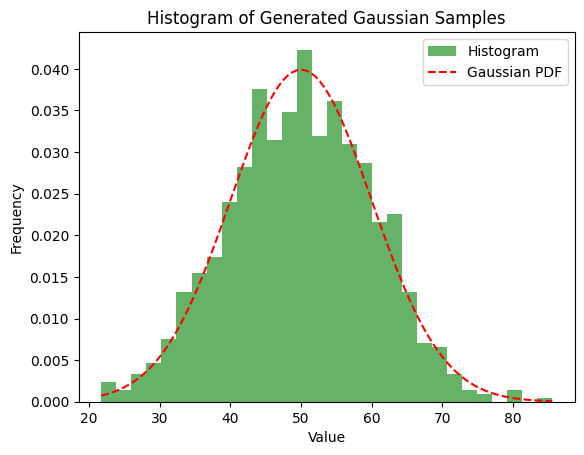

In [109]:
#6 ans)
import numpy as np

# Function to generate random samples from a Gaussian distribution
def generate_gaussian_samples(mean, std_dev, sample_size):
    """
    Generate random samples from a Gaussian distribution and calculate statistics.
    
    :param mean: Mean of the Gaussian distribution
    :param std_dev: Standard deviation of the Gaussian distribution
    :param sample_size: Number of random samples to generate
    :return: Tuple of (samples, mean, variance, standard deviation)
    """
    samples = np.random.normal(loc=mean, scale=std_dev, size=sample_size)
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples)
    sample_std_dev = np.std(samples)
    
    return samples, sample_mean, sample_variance, sample_std_dev

# Example usage
mean = 50  # Mean of the Gaussian distribution
std_dev = 10  # Standard deviation
sample_size = 1000  # Number of random samples

samples, sample_mean, sample_variance, sample_std_dev = generate_gaussian_samples(mean, std_dev, sample_size)

print("Generated Samples Statistics:")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")

# Optional: Plotting the distribution
import matplotlib.pyplot as plt

plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
x = np.linspace(min(samples), max(samples), 100)
plt.plot(x, (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2), 
         color='red', linestyle='dashed', label='Gaussian PDF')
plt.title('Histogram of Generated Gaussian Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Skewness of total_bill: 1.1332130376158205
Skewness of tip: 1.4654510370979401
Skewness type of total_bill: Positive skewness
Skewness type of tip: Positive skewness
Covariance between total_bill and tip: 8.323501629224854
Pearson correlation between total_bill and tip: 0.6757341092113646


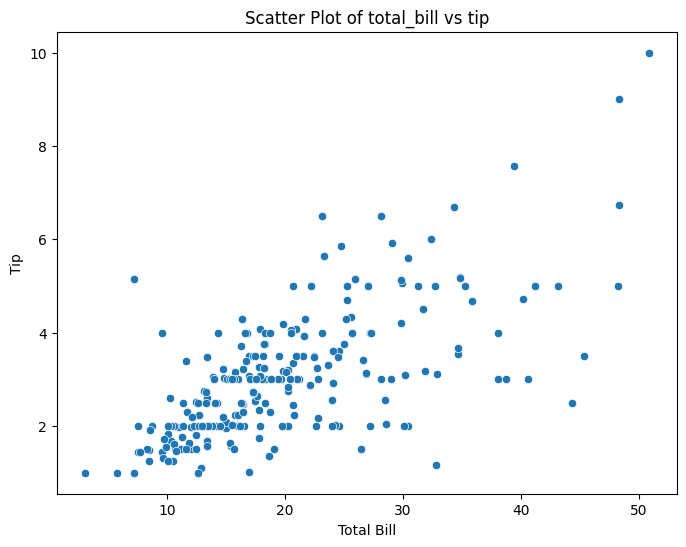

In [115]:
#7 ans

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Extract the relevant columns
total_bill = tips['total_bill']
tip = tips['tip']

#1)Calculate Skewness
def calculate_skewness(column):
    """
    Calculate the skewness of a given column.
    Positive skewness indicates a right-skewed distribution, 
    and negative skewness indicates a left-skewed distribution.
    """
    return column.skew()

# Calculate skewness for total_bill and tip
skew_total_bill = calculate_skewness(total_bill)
skew_tip = calculate_skewness(tip)

print(f"Skewness of total_bill: {skew_total_bill}")
print(f"Skewness of tip: {skew_tip}")

#(ii) Determine Skewness Type
def skewness_type(column):
    """
    Determine if a column is positively skewed, negatively skewed, or symmetric.
    """
    skewness = column.skew()
    if skewness > 0:
        return "Positive skewness"
    elif skewness < 0:
        return "Negative skewness"
    else:
        return "Approximately symmetric"

# Determine skewness type for total_bill and tip
print(f"Skewness type of total_bill: {skewness_type(total_bill)}")
print(f"Skewness type of tip: {skewness_type(tip)}")

#(iii) Calculate Covariance
def calculate_covariance(column1, column2):
    """
    Calculate the covariance between two columns.
    """
    return column1.cov(column2)

# Covariance between total_bill and tip
covariance = calculate_covariance(total_bill, tip)
print(f"Covariance between total_bill and tip: {covariance}")

#(iv) Calculate Pearson Correlation Coefficient
def calculate_pearson_correlation(column1, column2):
    """
    Calculate the Pearson correlation coefficient between two columns.
    """
    return column1.corr(column2)

# Pearson correlation between total_bill and tip
pearson_corr = calculate_pearson_correlation(total_bill, tip)
print(f"Pearson correlation between total_bill and tip: {pearson_corr}")

#(v) Visualize Correlation using Scatter Plot
def plot_correlation(column1, column2):
    """
    Plot a scatter plot to visualize correlation between two columns.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column1, y=column2)
    plt.title('Scatter Plot of total_bill vs tip')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()

# Visualize correlation
plot_correlation(total_bill, tip)


In [118]:
# 8 ans)
from scipy.stats import norm

mean = 0
std_dev = 1
x_value = 1
# Using scipy to calculate the PDF
pdf_value_scipy = norm.pdf(x_value, loc=mean, scale=std_dev)
print(f"PDF value using scipy at x = {x_value}: {pdf_value_scipy}")


PDF value using scipy at x = 1: 0.24197072451914337


In [120]:
#9 ans)
from scipy.stats import expon

rate = 0.5  # Example rate parameter (lambda)
x_value = 2  # Value at which to calculate CDF

# Using scipy to calculate the CDF
scale = 1 / rate  # Scale parameter is 1/lambda in scipy
cdf_value_scipy = expon.cdf(x_value, scale=scale)
print(f"CDF value using scipy at x = {x_value}: {cdf_value_scipy}")


CDF value using scipy at x = 2: 0.6321205588285577


In [124]:
#10 ans)

from scipy.stats import poisson

lam = 3  # Example rate parameter (lambda)
k_value = 2  # Number of occurrences

# Using scipy to calculate the PMF
pmf_value_scipy = poisson.pmf(k_value, mu=lam)
print(f"PMF value using scipy for k = {k_value}, lam = {lam}: {pmf_value_scipy}")


PMF value using scipy for k = 2, lam = 3: 0.22404180765538775


In [129]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Data
old_layout = np.array([1] * 50 + [0] * 950)
new_layout = np.array([1] * 70 + [0] * 930)

# Successes and sample sizes
x_old = old_layout.sum()  # Number of purchases in old layout
x_new = new_layout.sum()  # Number of purchases in new layout
n_old = len(old_layout)   # Number of visitors in old layout
n_new = len(new_layout)   # Number of visitors in new layout

# Perform two-proportion z-test
count = np.array([x_old, x_new])  # [Success in old, Success in new]
nobs = np.array([n_old, n_new])   # [Visitors in old, Visitors in new]

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The new layout has a significantly higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")


Z-statistic: -1.8831
P-value: 0.9702
Fail to reject the null hypothesis: No significant difference in conversion rates.


In [131]:
#12 ans)
import numpy as np
from scipy.stats import norm

# Data
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

# Step 1: Calculate the differences
differences = after_program - before_program

# Step 2: Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use sample standard deviation
n = len(differences)

# Step 3: Calculate the z-statistic
z_stat = mean_diff / (std_diff / np.sqrt(n))

# Step 4: Calculate the p-value for a one-tailed test
p_value = 1 - norm.cdf(z_stat)

# Results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The tutoring program significantly improved exam scores.")
else:
    print("Fail to reject the null hypothesis: No significant improvement in exam scores.")


Z-statistic: 4.5932
P-value: 0.0000
Reject the null hypothesis: The tutoring program significantly improved exam scores.


In [133]:
#13ans)
import numpy as np
from scipy.stats import norm

# Data
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

# Step 1: Calculate the differences
differences = before_drug - after_drug

# Step 2: Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use sample standard deviation
n = len(differences)

# Step 3: Calculate the z-statistic
z_stat = mean_diff / (std_diff / np.sqrt(n))

# Step 4: Calculate the p-value for a one-tailed test
p_value = norm.cdf(z_stat)

# Results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The drug significantly reduces blood pressure.")
else:
    print("Fail to reject the null hypothesis: No significant reduction in blood pressure.")


Z-statistic: 10.0499
P-value: 1.0000
Fail to reject the null hypothesis: No significant reduction in blood pressure.


In [135]:
import numpy as np
from scipy.stats import norm

# Data
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

# Step 1: Calculate the differences
differences = before_drug - after_drug

# Step 2: Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use sample standard deviation
n = len(differences)

# Step 3: Calculate the z-statistic
z_stat = mean_diff / (std_diff / np.sqrt(n))

# Step 4: Calculate the p-value for a one-tailed test
p_value = norm.cdf(z_stat)

# Results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The drug significantly reduces blood pressure.")
else:
    print("Fail to reject the null hypothesis: No significant reduction in blood pressure.")


Z-statistic: 10.0499
P-value: 1.0000
Fail to reject the null hypothesis: No significant reduction in blood pressure.


In [137]:
#14ans)
import numpy as np
from scipy.stats import norm

# Data
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])

# Step 1: Calculate the sample mean and standard deviation
sample_mean = np.mean(response_times)
sample_std = np.std(response_times, ddof=1)  # Use sample standard deviation
n = len(response_times)

# Step 2: Define the population mean (claimed mean)
claimed_mean = 5

# Step 3: Calculate the z-statistic
z_stat = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

# Step 4: Calculate the p-value for a one-tailed test
p_value = norm.cdf(z_stat)

# Results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The customer service's claim is true; the average response time is less than 5 minutes.")
else:
    print("Fail to reject the null hypothesis: There is no sufficient evidence to support the claim.")


Z-statistic: -3.1845
P-value: 0.0007
Reject the null hypothesis: The customer service's claim is true; the average response time is less than 5 minutes.


In [139]:
#15 ans)
import numpy as np
from scipy.stats import t

# Data
layout_a_clicks = np.array([28, 32, 33, 29, 31, 34, 30, 35, 36, 37])
layout_b_clicks = np.array([40, 41, 38, 42, 39, 44, 43, 41, 45, 47])

# Function to perform A/B test
def ab_test_analysis(group_a, group_b):
    # Sample statistics
    mean_a = np.mean(group_a)
    mean_b = np.mean(group_b)
    var_a = np.var(group_a, ddof=1)
    var_b = np.var(group_b, ddof=1)
    n_a = len(group_a)
    n_b = len(group_b)
    
    # Calculate t-statistic
    t_stat = (mean_a - mean_b) / np.sqrt((var_a / n_a) + (var_b / n_b))
    
    # Calculate degrees of freedom using Welch's formula
    df = ((var_a / n_a) + (var_b / n_b))**2 / (
        ((var_a / n_a)**2 / (n_a - 1)) + ((var_b / n_b)**2 / (n_b - 1))
    )
    
    # Calculate p-value (two-tailed test)
    p_value = 2 * t.cdf(-abs(t_stat), df)
    
    return t_stat, df, p_value

# Perform the A/B test
t_stat, df, p_value = ab_test_analysis(layout_a_clicks, layout_b_clicks)

# Results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two layouts.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two layouts.")


T-statistic: -7.2981
Degrees of Freedom: 17.8799
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between the two layouts.


In [141]:
#16)ans
import numpy as np
from scipy.stats import t

# Data
existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

# Function to perform two-sample t-test
def analyze_treatment_effect(group1, group2):
    # Sample statistics
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    
    # Calculate t-statistic
    t_stat = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))
    
    # Calculate degrees of freedom using Welch's formula
    df = ((var1 / n1) + (var2 / n2))**2 / (
        ((var1 / n1)**2 / (n1 - 1)) + ((var2 / n2)**2 / (n2 - 1))
    )
    
    # Calculate one-tailed p-value
    p_value = t.cdf(t_stat, df)
    
    return t_stat, df, p_value

# Perform the test
t_stat, df, p_value = analyze_treatment_effect(existing_drug_levels, new_drug_levels)

# Results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The new drug is more effective in reducing cholesterol.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the new drug is more effective.")


T-statistic: 4.1405
Degrees of Freedom: 17.8668
P-value: 0.9997
Fail to reject the null hypothesis: No significant evidence that the new drug is more effective.


In [143]:
#17 ans)
import numpy as np
from scipy.stats import t

# Data
pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

# Function to perform paired sample t-test
def analyze_intervention_impact(pre_scores, post_scores):
    # Calculate the differences between paired scores
    differences = np.array(post_scores) - np.array(pre_scores)
    
    # Calculate the mean and standard deviation of the differences
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    n = len(differences)
    
    # Calculate the t-statistic
    t_stat = mean_diff / (std_diff / np.sqrt(n))
    
    # Calculate the degrees of freedom
    df = n - 1
    
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))
    
    return t_stat, df, p_value

# Perform the test
t_stat, df, p_value = analyze_intervention_impact(pre_intervention_scores, post_intervention_scores)

# Results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The intervention had a significant impact on the test scores.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the intervention had an impact.")


T-statistic: 4.4284
Degrees of Freedom: 9
P-value: 0.0017
Reject the null hypothesis: The intervention had a significant impact on the test scores.


In [145]:
#18ans)
import numpy as np
from scipy import stats

# Generate synthetic salary data for male and female employees
np.random.seed(0)  # For reproducibility

male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)

# Function to perform independent two-sample t-test
def analyze_salary_gap(male_salaries, female_salaries):
    # Calculate the means and standard deviations for each group
    mean_male = np.mean(male_salaries)
    mean_female = np.mean(female_salaries)
    std_male = np.std(male_salaries, ddof=1)
    std_female = np.std(female_salaries, ddof=1)
    n_male = len(male_salaries)
    n_female = len(female_salaries)
    
    # Calculate the t-statistic and degrees of freedom
    t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries, equal_var=False)
    
    return t_stat, p_value

# Perform the test
t_stat, p_value = analyze_salary_gap(male_salaries, female_salaries)

# Results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in salaries between male and female employees.")
else:
    print("Fail to reject the null hypothesis: No significant difference in salaries between male and female employees.")


T-statistic: 0.0611
P-value: 0.9516
Fail to reject the null hypothesis: No significant difference in salaries between male and female employees.


In [147]:
#19 ans)
import numpy as np
from scipy import stats

# Data for version 1 and version 2 quality scores
version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]

# Function to perform the independent two-sample t-test
def analyze_quality_scores(version1_scores, version2_scores):
    # Calculate the t-statistic and p-value
    t_stat, p_value = stats.ttest_ind(version1_scores, version2_scores, equal_var=False)
    
    return t_stat, p_value

# Perform the test
t_stat, p_value = analyze_quality_scores(version1_scores, version2_scores)

# Results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in quality scores between the two versions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in quality scores between the two versions.")


T-statistic: 11.3258
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in quality scores between the two versions.


In [149]:
#20 ans)
import numpy as np
from scipy import stats

# Data for customer satisfaction scores from branch A and branch B
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

# Function to perform the independent two-sample t-test
def analyze_customer_satisfaction(branch_a_scores, branch_b_scores):
    # Perform the two-sample t-test
    t_stat, p_value = stats.ttest_ind(branch_a_scores, branch_b_scores, equal_var=False)
    
    return t_stat, p_value

# Perform the analysis
t_stat, p_value = analyze_customer_satisfaction(branch_a_scores, branch_b_scores)

# Display the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in customer satisfaction between the two branches.")
else:
    print("Fail to reject the null hypothesis: No significant difference in customer satisfaction between the two branches.")


T-statistic: 5.4801
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in customer satisfaction between the two branches.


In [151]:
#21 ans)
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Generate synthetic data
np.random.seed(0)

# Age groups and voter preferences
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=30)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=30)

# Create a DataFrame for better readability
data = pd.DataFrame({'Age Group': age_groups, 'Voter Preference': voter_preferences})

# Create a contingency table
contingency_table = pd.crosstab(data['Age Group'], data['Voter Preference'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between age groups and voter preferences.")
else:
    print("\nFail to reject the null hypothesis: No significant association between age groups and voter preferences.")


Contingency Table:
Voter Preference  Candidate A  Candidate B
Age Group                                 
18-30                       4            8
31-50                       6            5
51+                         4            3

Chi-Square Statistic: 1.4401669758812612
P-Value: 0.48671161971286614
Degrees of Freedom: 2
Expected Frequencies:
[[5.6        6.4       ]
 [5.13333333 5.86666667]
 [3.26666667 3.73333333]]

Fail to reject the null hypothesis: No significant association between age groups and voter preferences.


In [153]:
#22ans)

import numpy as np
from scipy.stats import chi2_contingency

# Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
# Rows represent [Satisfied, Neutral, Dissatisfied] and columns represent [East, West, North, South]
data = np.array([[50, 30, 40, 20],  # Satisfied
                 [30, 40, 30, 50],  # Neutral
                 [20, 30, 40, 30]])  # Dissatisfied

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Display the results
print("Contingency Table:")
print(data)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between product satisfaction levels and customer regions.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between product satisfaction levels and customer regions.")


Contingency Table:
[[50 30 40 20]
 [30 40 30 50]
 [20 30 40 30]]

Chi-Square Statistic: 27.777056277056275
P-Value: 0.00010349448486004387
Degrees of Freedom: 6
Expected Frequencies:
[[34.14634146 34.14634146 37.56097561 34.14634146]
 [36.58536585 36.58536585 40.24390244 36.58536585]
 [29.26829268 29.26829268 32.19512195 29.26829268]]

Reject the null hypothesis: There is a significant relationship between product satisfaction levels and customer regions.


In [157]:
#23ans)
import numpy as np
from scipy.stats import chi2_contingency

# Sample data: Job performance levels before (rows) and after (columns) training
# Rows represent: Effective, Neutral, Ineffective before training
# Columns represent: Effective, Neutral, Ineffective after training
data = np.array([[50, 30, 20],  # Before: Effective, Neutral, Ineffective
                 [30, 40, 30],  # Before: Effective, Neutral, Ineffective
                 [20, 30, 40]])  # Before: Effective, Neutral, Ineffective

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Display the results
print("Contingency Table:")
print(data)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in job performance levels before and after the training.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in job performance levels before and after the training.")


Contingency Table:
[[50 30 20]
 [30 40 30]
 [20 30 40]]

Chi-Square Statistic: 22.161728395061726
P-Value: 0.00018609719479882554
Degrees of Freedom: 4
Expected Frequencies:
[[34.48275862 34.48275862 31.03448276]
 [34.48275862 34.48275862 31.03448276]
 [31.03448276 31.03448276 27.93103448]]

Reject the null hypothesis: There is a significant difference in job performance levels before and after the training.


In [159]:
#24ans)
import numpy as np
from scipy.stats import f_oneway

# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(standard_scores, premium_scores, deluxe_scores)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in customer satisfaction scores among the product versions.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in customer satisfaction scores among the product versions.")


F-statistic: 27.03556231003039
P-value: 3.578632885734896e-07

Reject the null hypothesis: There is a significant difference in customer satisfaction scores among the product versions.
